<a href="https://colab.research.google.com/github/dahoumanekhalil/testing-data-python/blob/main/Copy_of_Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("/content/Heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


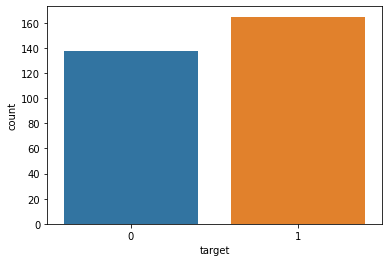

In [ ]:
df['target'].unique()
sns.countplot(data=df,x='target')

In [ ]:
X = df.drop('target',axis = 1)
y = df['target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=80)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 97)
KNN.fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_KNN))

0.8688524590163934


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


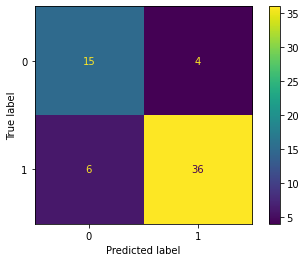

In [ ]:
confusion_matrix(y_test,y_pred_KNN)
plot_confusion_matrix(KNN,X_test,y_test)

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train,y_train)
y_pred_SVM = SVM.predict(X_test)
print(accuracy_score(y_test,y_pred_SVM))

0.819672131147541


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


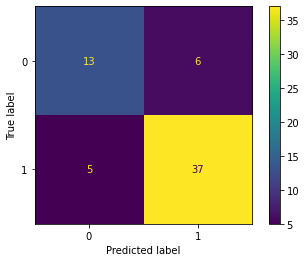

In [ ]:
confusion_matrix(y_test,y_pred_SVM)
plot_confusion_matrix(SVM,X_test,y_test);

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
ANN = tf.keras.models.Sequential()
ANN.add(tf.keras.layers.Dense(units=6,activation='relu'))
ANN.add(tf.keras.layers.Dense(units=6,activation='relu'))
ANN.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ANN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ANN.fit(X_train,y_train,batch_size = 64,epochs=200)
y_pred_ANN = ANN.predict(X_test)
y_pred_ANN = (y_pred_ANN > 0.5)
print(accuracy_score(y_test, y_pred_ANN))


Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.7824 - accuracy: 0.4174
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7750 - accuracy: 0.4174
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7688 - accuracy: 0.4215
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7624 - accuracy: 0.4091
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7568 - accuracy: 0.3967
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7514 - accuracy: 0.3884
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.3884
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7418 - accuracy: 0.3884
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7379 - accuracy: 0.3719
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7335 - accuracy: 0.3719
Epoch 11/200
4/4 [===========

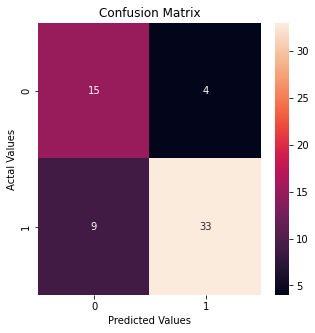

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_ANN)
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()